# Indian Food Delivery Restaurant Aggregator

## **1. Understanding, reading and cleaning the data before the analysis:**

**A. Importing the necessary libraries and loading the required data set**

In [1]:
#importing the necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style('darkgrid') 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the required dataset (Zomato - csv file)
zomato_dataset = pd.read_csv("Zomato.CSV")

# Printing sample data
zomato_dataset.head(3)

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR


**B. Understanding the data-set**

In [3]:
#shape of the dataset:
print('Shape of the data-set:', zomato_dataset.shape)

Shape of the data-set: (10000, 18)


In [4]:
#information from the dataset:
zomato_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   10000 non-null  int64 
 1   url                          10000 non-null  object
 2   address                      10000 non-null  object
 3   name                         10000 non-null  object
 4   online_order                 10000 non-null  object
 5   book_table                   10000 non-null  object
 6   rate                         8528 non-null   object
 7   votes                        10000 non-null  int64 
 8   phone                        9764 non-null   object
 9   location                     9997 non-null   object
 10  rest_type                    9953 non-null   object
 11  dish_liked                   4642 non-null   object
 12  cuisines                     9995 non-null   object
 13  approx_cost(for two people)  994

In [5]:
#Finding the different types of varialbles in the dataset:
zomato_dataset.dtypes

Unnamed: 0                      int64
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

**C. Data Cleaning**

In [6]:
#Finding if there are any duplicate rows:
sum(zomato_dataset.duplicated())

909

In [7]:
#Removing duplicate rows if any
zomato_dataset=zomato_dataset.drop_duplicates()

In [8]:
#printing the shape of the dataset after deleting all the duplicate rows: 
print('Shape After deleting duplicate values:', zomato_dataset.shape)

Shape After deleting duplicate values: (9091, 18)


In [9]:
#Dropping unnecessary columns:
zomato_dataset.drop(['url','address','phone','reviews_list','menu_item','location','dish_liked'],axis=1,inplace=True)
zomato_dataset.head(10)

,Unnamed: 0,name,online_order,book_table,rate,votes,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,14221,Shree Ranga Vilas,No,No,3.2/5,7,Casual Dining,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
1,43422,Sphyre - Gateway Hotel,No,No,3.6 /5,45,Lounge,Finger Food,"1,700",Dine-out,MG Road
2,16032,Popular Bakery,No,No,3.7/5,36,"Dessert Parlor, Bakery","Desserts, Bakery",600,Delivery,HSR
3,51635,Thai & Chinese Fast Food,No,No,3.4 /5,7,Quick Bites,"Chinese, Thai",400,Dine-out,Whitefield
4,23424,Grill On Wheels,No,No,NEW,0,Quick Bites,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,Dine-out,JP Nagar
5,15103,Patisserie Nitash,No,No,4.2/5,142,Bakery,Bakery,500,Delivery,Frazer Town
6,10096,Cake N Cookies,No,No,NaN,0,Bakery,Bakery,350,Delivery,BTM
7,35354,Bombay Talkies,Yes,No,3.6 /5,24,Quick Bites,"Maharashtrian, Fast Food, Street Food, Sandwich",200,Delivery,Koramangala 7th Block
8,29058,Cafe 58,No,No,3.4 /5,4,Quick Bites,"Fast Food, Biryani",200,Dine-out,Koramangala 4th Block
9,32593,Shagun Sweets & Foods,Yes,No,3.5 /5,221,"Sweet Shop, Quick Bites","Mithai, North Indian, Street Food, Chinese",400,Delivery,Koramangala 6th Block


In [10]:
#printing the shape of the dataset after deleting all the unwanted columns: 
print('Shape After deleting unwanted columns:', zomato_dataset.shape)

Shape After deleting unwanted columns: (9091, 11)


In [11]:
#Renaming the columns:
zomato_dataset.rename(columns = {'Unnamed: 0':'Rset_id','name':'Name', 'book_table':'Table_booking','rate':'Ratings', 'votes':'No_of_votes','rest_type':'Rest_type','cuisines':'Cusines','approx_cost(for two people)':'Cost', 'listed_in(type)':'Service_type','listed_in(city)':'City'},inplace=True )
zomato_dataset.head(10)

,Rset_id,Name,online_order,Table_booking,Ratings,No_of_votes,Rest_type,Cusines,Cost,Service_type,City
0,14221,Shree Ranga Vilas,No,No,3.2/5,7,Casual Dining,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
1,43422,Sphyre - Gateway Hotel,No,No,3.6 /5,45,Lounge,Finger Food,"1,700",Dine-out,MG Road
2,16032,Popular Bakery,No,No,3.7/5,36,"Dessert Parlor, Bakery","Desserts, Bakery",600,Delivery,HSR
3,51635,Thai & Chinese Fast Food,No,No,3.4 /5,7,Quick Bites,"Chinese, Thai",400,Dine-out,Whitefield
4,23424,Grill On Wheels,No,No,NEW,0,Quick Bites,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,Dine-out,JP Nagar
5,15103,Patisserie Nitash,No,No,4.2/5,142,Bakery,Bakery,500,Delivery,Frazer Town
6,10096,Cake N Cookies,No,No,NaN,0,Bakery,Bakery,350,Delivery,BTM
7,35354,Bombay Talkies,Yes,No,3.6 /5,24,Quick Bites,"Maharashtrian, Fast Food, Street Food, Sandwich",200,Delivery,Koramangala 7th Block
8,29058,Cafe 58,No,No,3.4 /5,4,Quick Bites,"Fast Food, Biryani",200,Dine-out,Koramangala 4th Block
9,32593,Shagun Sweets & Foods,Yes,No,3.5 /5,221,"Sweet Shop, Quick Bites","Mithai, North Indian, Street Food, Chinese",400,Delivery,Koramangala 6th Block


### D. cleaning Individual Rows:

In [12]:
#unique values in names
zomato_dataset['Name'].unique().sum()

"Shree Ranga VilasSphyre - Gateway HotelPopular BakeryThai & Chinese Fast FoodGrill On WheelsPatisserie NitashCake N CookiesBombay TalkiesCafe 58Shagun Sweets & FoodsHigh Ultra LoungePark N EatOcean's DelightMasala CentralJust BakedSri Guru Kottureshwara Davangere Benne DosaThe Fisherman's WharfOnce Upon A FlameAndhra RuchuluLakshmi Rayalaseema RuchiluHomifooVintage ShackKolkata RestaurantBombay KulfiThe Good BowlSrinidhi Real FoodTuffreysKebarbiqHappy Belly BakesAxomi - Taste of AssamThe Shawarma ShopHotel RamprasadSanju's Super KitchenLakeview MilkbarElmas RestaurantDice N DineGing - Royal Orchid CentralIvyThalassery RestaurantThe Elaichi RestaurantTaj RestaurantAmul Ice CreamPatiala HighwayShammah'sHatti KaapiSreeraj Lassi BarUrban Tamaasha4700BC PopcornKettle & KegsCaraway Kitchen - Conrad BengaluruRayalaseema Ruchulu1522 - The PubParivaarThe Black PearlChinese StreetMaravantheCold Stone CreameryNew Banashankari Donne BiryaniKentacky Chicken CornerLassi CornerParatha TreatRotti Man

In [13]:
def name_clean(text):
    return re.sub("[^a-zA-Z0-9 ]", "", text) 

zomato_dataset['Name'] = zomato_dataset['Name'].apply(lambda x: name_clean(x))

In [14]:
#unique values in names
zomato_dataset['Name'].unique().sum()

'Shree Ranga VilasSphyre  Gateway HotelPopular BakeryThai  Chinese Fast FoodGrill On WheelsPatisserie NitashCake N CookiesBombay TalkiesCafe 58Shagun Sweets  FoodsHigh Ultra LoungePark N EatOceans DelightMasala CentralJust BakedSri Guru Kottureshwara Davangere Benne DosaThe Fishermans WharfOnce Upon A FlameAndhra RuchuluLakshmi Rayalaseema RuchiluHomifooVintage ShackKolkata RestaurantBombay KulfiThe Good BowlSrinidhi Real FoodTuffreysKebarbiqHappy Belly BakesAxomi  Taste of AssamThe Shawarma ShopHotel RamprasadSanjus Super KitchenLakeview MilkbarElmas RestaurantDice N DineGing  Royal Orchid CentralIvyThalassery RestaurantThe Elaichi RestaurantTaj RestaurantAmul Ice CreamPatiala HighwayShammahsHatti KaapiSreeraj Lassi BarUrban Tamaasha4700BC PopcornKettle  KegsCaraway Kitchen  Conrad BengaluruRayalaseema Ruchulu1522  The PubParivaarThe Black PearlChinese StreetMaravantheCold Stone CreameryNew Banashankari Donne BiryaniKentacky Chicken CornerLassi CornerParatha TreatRotti ManeHappy BrewR

In [15]:
zomato_dataset['Name'].unique() #finding the unique Names 

array(['Shree Ranga Vilas', 'Sphyre  Gateway Hotel', 'Popular Bakery',
       ..., 'Sai Cafe Veg', 'Food Square', 'Cheers Life'], dtype=object)

In [16]:
#Ratings column:
zomato_dataset['Ratings'].unique()

array(['3.2/5', '3.6 /5', '3.7/5', '3.4 /5', 'NEW', '4.2/5', nan,
       '3.5 /5', '4.1 /5', '3.4/5', '4.3 /5', '4.5/5', '3.0/5', '3.9/5',
       '3.0 /5', '4.0 /5', '4.2 /5', '3.5/5', '2.9 /5', '4.3/5', '4.4 /5',
       '3.8/5', '3.6/5', '3.3/5', '3.9 /5', '3.3 /5', '4.7/5', '3.1 /5',
       '-', '4.5 /5', '3.2 /5', '3.8 /5', '3.7 /5', '2.5 /5', '4.0/5',
       '4.6 /5', '4.1/5', '2.6/5', '3.1/5', '4.4/5', '2.6 /5', '2.7 /5',
       '2.9/5', '2.5/5', '2.8/5', '4.6/5', '4.7 /5', '2.8 /5', '4.8 /5',
       '4.8/5', '2.7/5', '4.9 /5', '2.2/5', '2.3 /5', '4.9/5', '2.4 /5',
       '2.3/5', '2.1 /5', '2.4/5', '2.1/5', '2.2 /5'], dtype=object)

In [17]:
#Removing all the insignificant data such as NEW and - 
zomato_dataset['Ratings']=zomato_dataset['Ratings'].replace('NEW',np.nan)
zomato_dataset['Ratings']=zomato_dataset['Ratings'].replace('-',np.nan)

zomato_dataset['Ratings'].unique()

#zomato_dataset['Ratings']=zomato_dataset['Ratings'].replace('nan',np.nan)

array(['3.2/5', '3.6 /5', '3.7/5', '3.4 /5', nan, '4.2/5', '3.5 /5',
       '4.1 /5', '3.4/5', '4.3 /5', '4.5/5', '3.0/5', '3.9/5', '3.0 /5',
       '4.0 /5', '4.2 /5', '3.5/5', '2.9 /5', '4.3/5', '4.4 /5', '3.8/5',
       '3.6/5', '3.3/5', '3.9 /5', '3.3 /5', '4.7/5', '3.1 /5', '4.5 /5',
       '3.2 /5', '3.8 /5', '3.7 /5', '2.5 /5', '4.0/5', '4.6 /5', '4.1/5',
       '2.6/5', '3.1/5', '4.4/5', '2.6 /5', '2.7 /5', '2.9/5', '2.5/5',
       '2.8/5', '4.6/5', '4.7 /5', '2.8 /5', '4.8 /5', '4.8/5', '2.7/5',
       '4.9 /5', '2.2/5', '2.3 /5', '4.9/5', '2.4 /5', '2.3/5', '2.1 /5',
       '2.4/5', '2.1/5', '2.2 /5'], dtype=object)

### E. Handling missing data 

In [18]:
#Checking for number of missing vales from each columns and count of missing values in each columns 
zomato_dataset.isnull().sum()

Rset_id             0
Name                0
online_order        0
Table_booking       0
Ratings          1723
No_of_votes         0
Rest_type          44
Cusines             5
Cost               54
Service_type        0
City                0
dtype: int64

In [19]:
#list of columns having missing values
print([features for features in zomato_dataset.columns if zomato_dataset[features].isnull().sum()>0])

['Ratings', 'Rest_type', 'Cusines', 'Cost']


In [20]:
#Shape of dataset before removing the unwanted rows and columns
zomato_dataset.shape

(9091, 11)

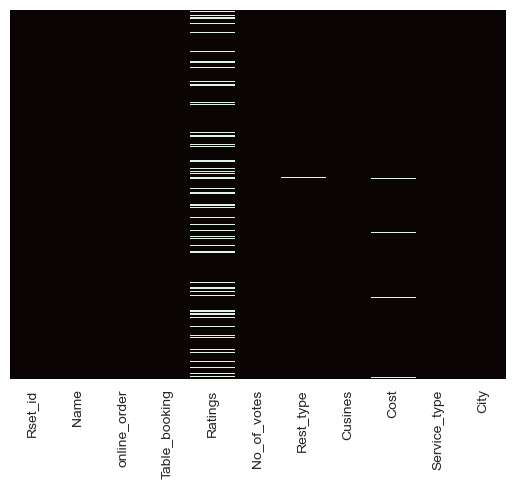

In [21]:
sns.heatmap(zomato_dataset.isnull(),yticklabels=False,cbar=False,cmap='mako')
plt.show()

In [22]:
#we can see a few missing values, particularly in the ‘Ratings’ column. 
#Seeing that now not a good deal of facts is lacking within the other columns, we can drop the corresponding rows.

In [23]:
#Dropping the missing values and respective rows 
zomato_dataset=zomato_dataset.dropna()

In [24]:
zomato_dataset.shape

(7295, 11)

In [25]:
#information from the dataset after cleaning the data:
zomato_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7295 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rset_id        7295 non-null   int64 
 1   Name           7295 non-null   object
 2   online_order   7295 non-null   object
 3   Table_booking  7295 non-null   object
 4   Ratings        7295 non-null   object
 5   No_of_votes    7295 non-null   int64 
 6   Rest_type      7295 non-null   object
 7   Cusines        7295 non-null   object
 8   Cost           7295 non-null   object
 9   Service_type   7295 non-null   object
 10  City           7295 non-null   object
dtypes: int64(2), object(9)
memory usage: 683.9+ KB


## 2. The analysis is performed by asnwering the following questions:

**1. List of top restaurant chains based on the distribution(frequency) in Bengaluru:**

In [26]:
name_group = zomato_dataset.groupby('Name') #grouping the dataset with respect to name column

size_name = name_group.size().sort_values(ascending=False) #To find the number of counts of each restaurant (using .size()) 
#and to filter and display restaurants with maximum number of distribution frequency using sort_values(ascending=False) 

df=pd.DataFrame(size_name, columns=["Frequency_distribution"]).reset_index()[0:20] #size_name is a Series. 
#Converting it into a DataFrame and assigning the column name Frequency_distribution

df.head(5) #Displaying to 5 restaurants chains based on distribution frequency


,Name,Frequency_distribution
0,McDonalds,16
1,Baskin Robbins,16
2,Onesta,15
3,Keventers,15
4,Cafe Coffee Day,14


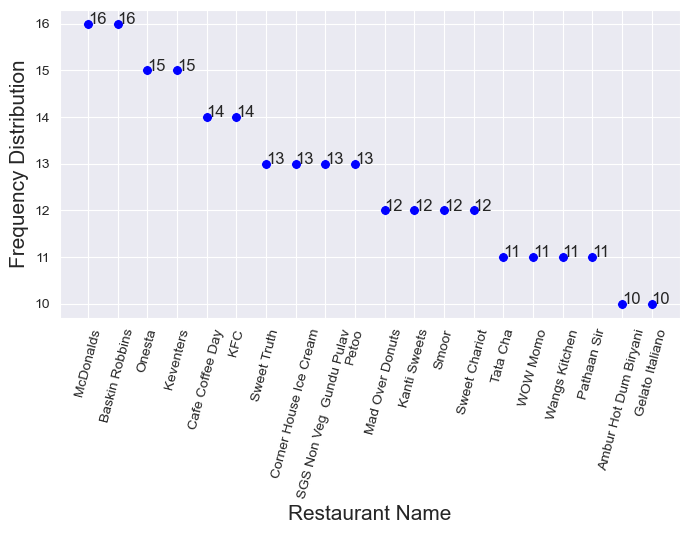

In [27]:
#Plotting a scatter plot to show the top restaurant chains based on the distribution(frequency) 
#in Bengaluru

fig = plt.figure(figsize = (8, 4))
 
sns.scatterplot(df.Name,df.Frequency_distribution,s=50,color='blue')

for i,e in enumerate(df.Frequency_distribution):
    plt.text(i,e, round(e,2),fontsize=12,horizontalalignment='left')

plt.xlabel('Restaurant Name',size=15)
plt.ylabel('Frequency Distribution',size=15)
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=75)
plt.show()

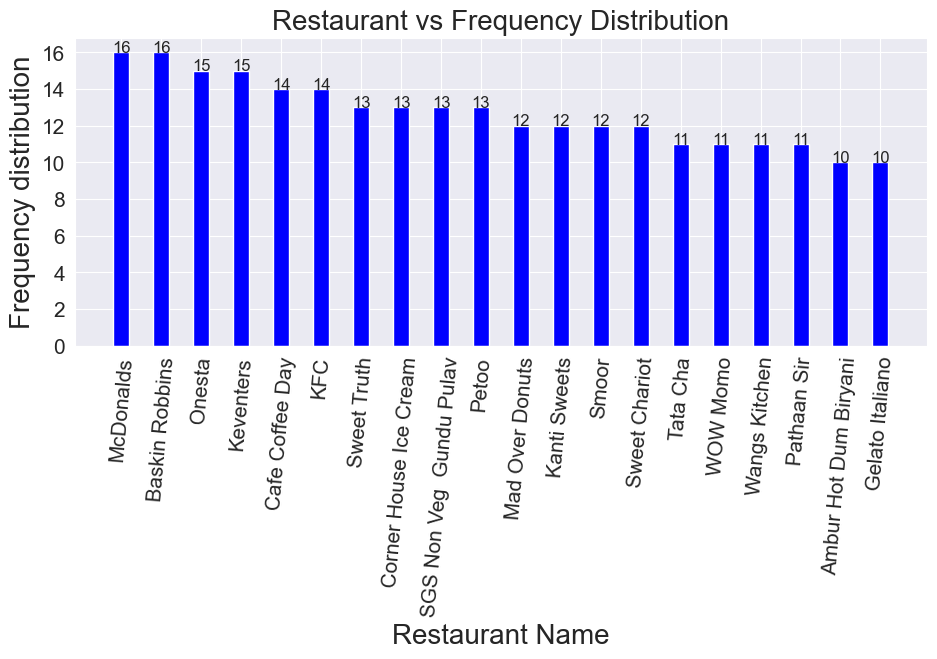

In [28]:
#Plotting a bar plot to show the top restaurant chains based on the distribution(frequency) 
#in Bengaluru

fig = plt.figure(figsize = (11, 4)) # figure size 
plt.bar(df.Name, df.Frequency_distribution, color ='blue', width = 0.4)

for i,e in enumerate(df.Frequency_distribution):
    plt.text(i,e, round(e,2),fontsize=12,horizontalalignment='center')
    
plt.title('Restaurant vs Frequency Distribution', size=20)
plt.xlabel('Restaurant Name',size=20)
plt.ylabel('Frequency distribution',size=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=85)
plt.show()

**2. Restaurants that do not accept online orders:**

In [29]:
mask =(zomato_dataset.online_order == 'No') 
df=zomato_dataset[mask]

print("The number of restaurants that do not accept online orders are:", 
df['online_order'].value_counts(),'\n')
df.head()

The number of restaurants that do not accept online orders are: No    2439
Name: online_order, dtype: int64 



,Rset_id,Name,online_order,Table_booking,Ratings,No_of_votes,Rest_type,Cusines,Cost,Service_type,City
0,14221,Shree Ranga Vilas,No,No,3.2/5,7,Casual Dining,"North Indian, South Indian, Chinese, Juices",500,Dine-out,Electronic City
1,43422,Sphyre Gateway Hotel,No,No,3.6 /5,45,Lounge,Finger Food,"1,700",Dine-out,MG Road
2,16032,Popular Bakery,No,No,3.7/5,36,"Dessert Parlor, Bakery","Desserts, Bakery",600,Delivery,HSR
3,51635,Thai Chinese Fast Food,No,No,3.4 /5,7,Quick Bites,"Chinese, Thai",400,Dine-out,Whitefield
5,15103,Patisserie Nitash,No,No,4.2/5,142,Bakery,Bakery,500,Delivery,Frazer Town


In [30]:
#list of restaurants that do not accept online orders 
print("The list of restaurants that do not accept online orders:\n\n", list(df["Name"])) #list
df["Name"]

The list of restaurants that do not accept online orders:

 ['Shree Ranga Vilas', 'Sphyre  Gateway Hotel', 'Popular Bakery', 'Thai  Chinese Fast Food', 'Patisserie Nitash', 'Cafe 58', 'High Ultra Lounge', 'Oceans Delight', 'Kolkata Restaurant', 'Srinidhi Real Food', 'Kebarbiq', 'Sanjus Super Kitchen', 'Lakeview Milkbar', 'Taj Restaurant', 'Shammahs', '4700BC Popcorn', 'Caraway Kitchen  Conrad Bengaluru', '1522  The Pub', 'Parivaar', 'The Black Pearl', 'New Banashankari Donne Biryani', 'Kentacky Chicken Corner', 'Lassi Corner', 'Rotti Mane', 'Happy Brew', 'Wild Thyme Restaurant', 'Juice Berg', 'The Onyx  The HHI Select Bengaluru', 'Little Green Cafe', 'The Barn  Bar  Kitchen', 'Imperio Cafe', 'Naadan Bhakshanasaala', 'Tijouri', 'Basmatis Briyani Nation', 'Cafe  Elanza', 'Chinita Real Mexican Food', 'The Terrace at Gillys Redefined', '9th Cross Cafe', 'Truffles', 'Barleyz', 'Oak Tavern', 'Adda', 'Bhive', 'King Punjabi Restaurant', 'Hide Out Cafe', 'Singh Punjabi Dhaba', 'Anjappar', 'Yoma

0             Shree Ranga Vilas
1         Sphyre  Gateway Hotel
2                Popular Bakery
3       Thai  Chinese Fast Food
5             Patisserie Nitash
                 ...           
9983                  Cafe Hush
9984               Sai Cafe Veg
9991                White Horse
9994                Caf Delight
9997             TBC Sky Lounge
Name: Name, Length: 2439, dtype: object

**3. Ratio between restaurants that provide and do not provide table bookings:**

In [31]:
d=zomato_dataset.groupby('Table_booking').size()
df=pd.DataFrame(d,columns=['Count']).reset_index()
l=list(df.Count)
l
if(l[0]>l[1]):
    ratio = l[0]/l[1]
    print(l[0],":", l[1])
else:
    ratio = l[1]/l[0]
    print(l[1],":", l[0])
print("Ratio between restaurants that provide and do not provide table bookings:", round(ratio,1))

6192 : 1103
Ratio between restaurants that provide and do not provide table bookings: 5.6


**4.	Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.**

In [32]:
#Ratings column:
zomato_dataset['Ratings'].unique()

array(['3.2/5', '3.6 /5', '3.7/5', '3.4 /5', '4.2/5', '3.5 /5', '4.1 /5',
       '3.4/5', '4.3 /5', '4.5/5', '3.0/5', '3.9/5', '3.0 /5', '4.0 /5',
       '4.2 /5', '3.5/5', '2.9 /5', '4.3/5', '4.4 /5', '3.8/5', '3.6/5',
       '3.3/5', '3.9 /5', '3.3 /5', '4.7/5', '3.1 /5', '4.5 /5', '3.2 /5',
       '3.8 /5', '3.7 /5', '2.5 /5', '4.0/5', '4.6 /5', '4.1/5', '2.6/5',
       '3.1/5', '4.4/5', '2.6 /5', '2.7 /5', '2.9/5', '2.5/5', '2.8/5',
       '4.6/5', '4.7 /5', '2.8 /5', '4.8 /5', '4.8/5', '2.7/5', '4.9 /5',
       '2.2/5', '2.3 /5', '4.9/5', '2.4 /5', '2.3/5', '2.1 /5', '2.4/5',
       '2.1/5', '2.2 /5'], dtype=object)

In [33]:
#function to remove '/5'
def remove_5(value):
    if type(value)==str:
        new_value=value.split('/')[0]
        return new_value

zomato_dataset['Ratings']=zomato_dataset['Ratings'].apply(remove_5)

zomato_dataset['Ratings'].unique()

array(['3.2', '3.6 ', '3.7', '3.4 ', '4.2', '3.5 ', '4.1 ', '3.4', '4.3 ',
       '4.5', '3.0', '3.9', '3.0 ', '4.0 ', '4.2 ', '3.5', '2.9 ', '4.3',
       '4.4 ', '3.8', '3.6', '3.3', '3.9 ', '3.3 ', '4.7', '3.1 ', '4.5 ',
       '3.2 ', '3.8 ', '3.7 ', '2.5 ', '4.0', '4.6 ', '4.1', '2.6', '3.1',
       '4.4', '2.6 ', '2.7 ', '2.9', '2.5', '2.8', '4.6', '4.7 ', '2.8 ',
       '4.8 ', '4.8', '2.7', '4.9 ', '2.2', '2.3 ', '4.9', '2.4 ', '2.3',
       '2.1 ', '2.4', '2.1', '2.2 '], dtype=object)

In [34]:
type(zomato_dataset['Ratings'])

pandas.core.series.Series

In [35]:
# converting to float type data

zomato_dataset['Ratings']=zomato_dataset['Ratings'].astype(float)
print(zomato_dataset['Ratings'].dtypes)

float64


In [36]:
zomato_dataset['Ratings'].unique()

array([3.2, 3.6, 3.7, 3.4, 4.2, 3.5, 4.1, 4.3, 4.5, 3. , 3.9, 4. , 2.9,
       4.4, 3.8, 3.3, 4.7, 3.1, 2.5, 4.6, 2.6, 2.7, 2.8, 4.8, 4.9, 2.2,
       2.3, 2.4, 2.1])

In [37]:
zomato_dataset.describe()

,Rset_id,Ratings,No_of_votes
count,7295.000000,7295.000000,7295.000000
mean,26051.984373,3.706621,362.706374
std,14935.049365,0.436583,897.940913
min,0.000000,2.100000,0.000000
25%,13117.000000,3.400000,22.000000
50%,26412.000000,3.700000,76.000000
75%,39138.500000,4.000000,289.000000
max,51716.000000,4.900000,14956.000000


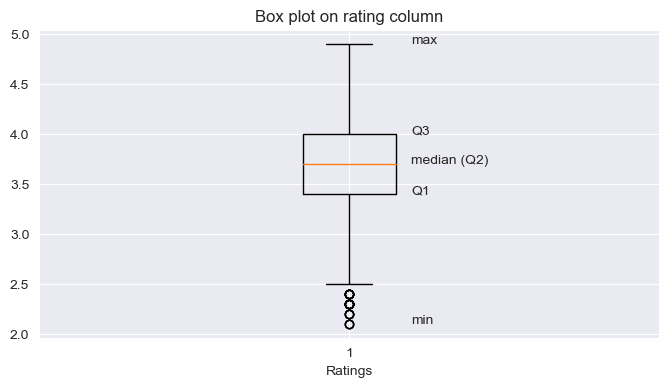

In [38]:
plt.figure(figsize=(8,4))

plt.boxplot(zomato_dataset.Ratings)

# add labels for five number summary using text()
# x is location on x-axis
# y is the location on y-axis
# s is the text 

plt.text(x = 1.1, y = zomato_dataset['Ratings'].min(), s ='min')              # for minimun
plt.text(x = 1.1, y = zomato_dataset['Ratings'].quantile(0.25), s ='Q1')         # for quartile 1
plt.text(x = 1.1, y = zomato_dataset['Ratings'].median(), s ='median (Q2)')   # for quartile 2
plt.text(x = 1.1, y = zomato_dataset['Ratings'].quantile(0.75), s ='Q3')         # for quartile 3
plt.text(x = 1.1, y = zomato_dataset['Ratings'].max(), s ='max')              # for maximum


plt.title("Box plot on rating column")
plt.xlabel('Ratings')
plt.show()

**5. Online and Offline orders restaurants percentage**

In [39]:
l = len(zomato_dataset.online_order)

df=zomato_dataset.groupby('online_order').size()
d=pd.DataFrame(df,columns=['Count'])
d['Percentage']=round(d['Count']/l*100,1)
d.head()

,Count,Percentage
online_order,,
No,2439,33.4
Yes,4856,66.6


**6. Plot the scatter plot using the Cost vs Rating variable with respect to online order. Use apply function Or other function to remove “,”.**

In [40]:
#Removing the commas from the cost
zomato_dataset['Cost'].unique() #checking for unique values 

def cost(value):
    value = str(value)
    if "," in value:
        value = float(value.replace(",",""))
        return value
    else:
        return float(value)
zomato_dataset['Cost'] = zomato_dataset['Cost'].apply(cost)
print(zomato_dataset['Cost'].head())

0     500.0
1    1700.0
2     600.0
3     400.0
5     500.0
Name: Cost, dtype: float64


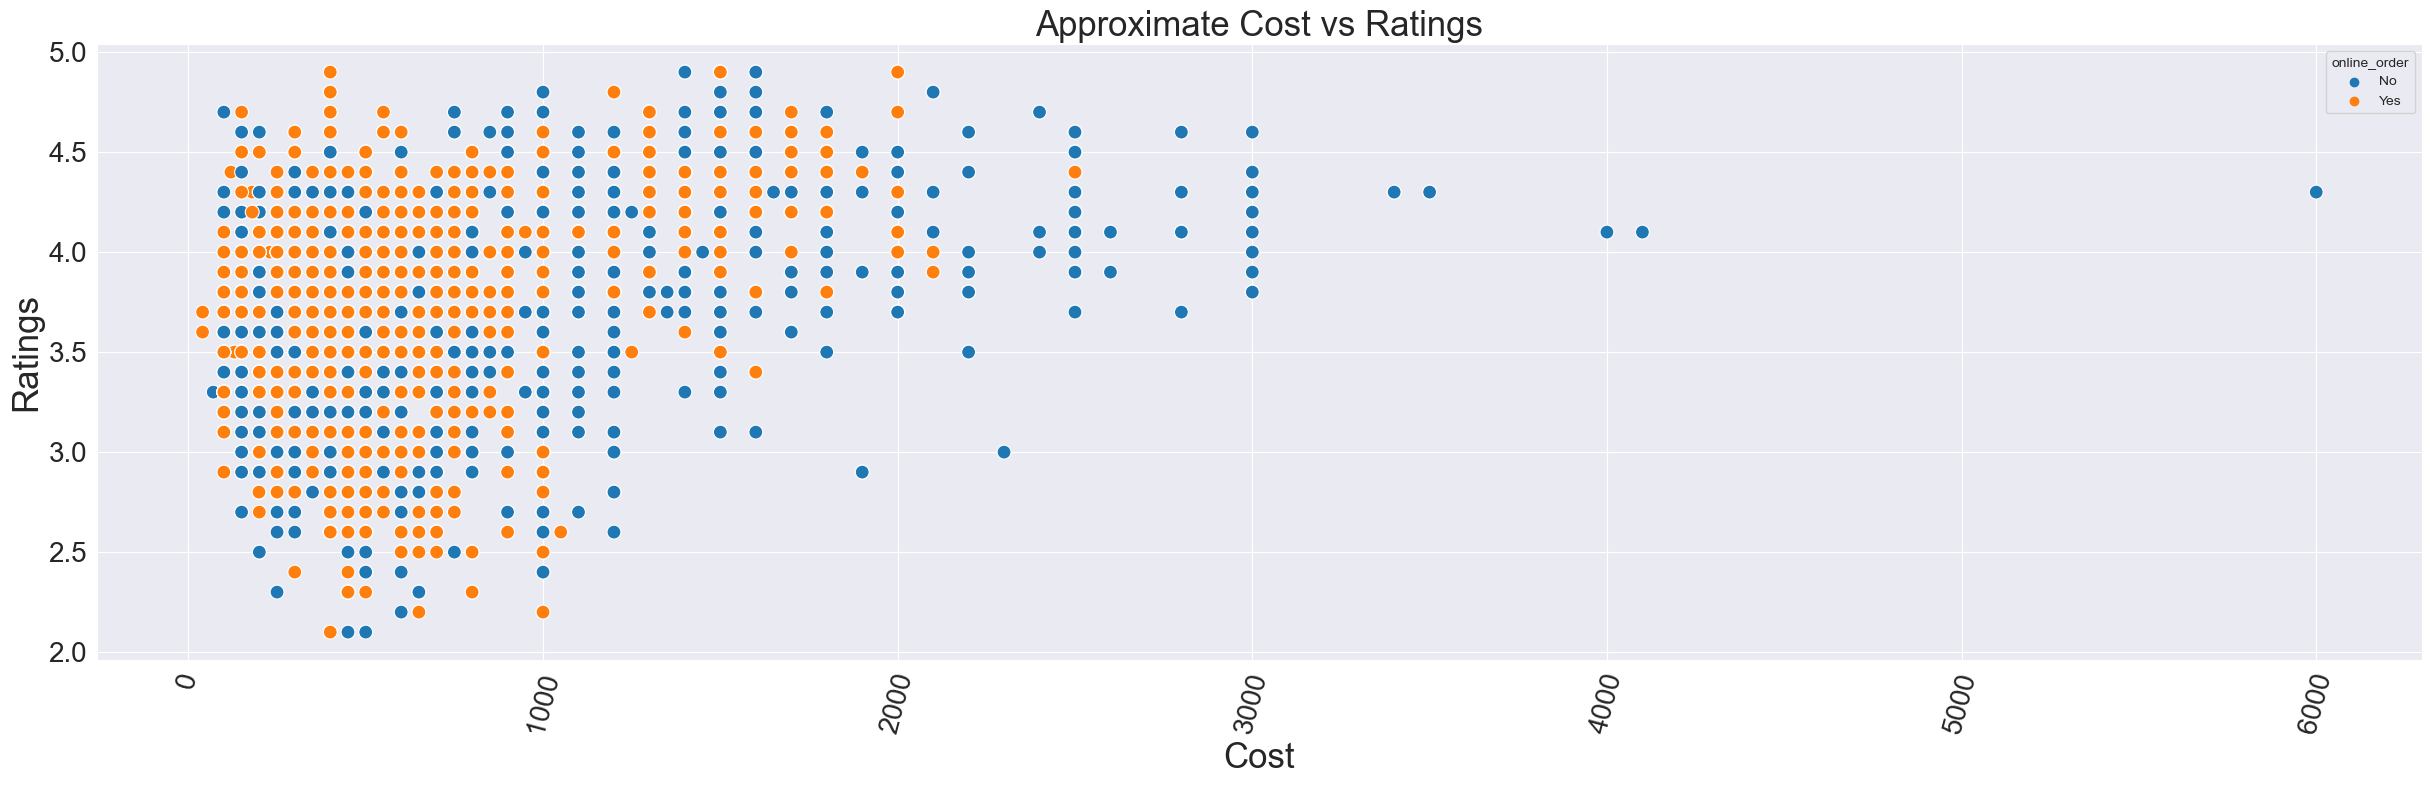

In [41]:
fig = plt.figure(figsize=(30,8))
sns.scatterplot(zomato_dataset.Cost,zomato_dataset.Ratings,hue=zomato_dataset.online_order,s=100, color='blue')

plt.xlabel('Cost',size=25)
plt.ylabel('Ratings',size=25)
plt.title('Approximate Cost vs Ratings',size=25)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=75)
plt.show()

**7. Find the distribution of the votes and approximate cost using a user-defined function and for a loop.**

In [42]:
def distribution(values):
    distribution_dict = {}
    for i in values:
        if i in distribution_dict:
            distribution_dict[i] += 1
        else:
            distribution_dict[i] = 1
    return distribution_dict
    
    
    
votes = distribution(zomato_dataset['No_of_votes'])

costs = distribution(zomato_dataset['Cost'])
costs

{500.0: 724,
 1700.0: 46,
 600.0: 539,
 400.0: 932,
 200.0: 563,
 2600.0: 4,
 300.0: 928,
 700.0: 337,
 150.0: 217,
 1400.0: 86,
 1200.0: 157,
 800.0: 347,
 900.0: 125,
 250.0: 394,
 650.0: 144,
 2000.0: 68,
 2800.0: 9,
 1000.0: 275,
 450.0: 243,
 750.0: 123,
 950.0: 9,
 1500.0: 169,
 350.0: 224,
 550.0: 129,
 1300.0: 87,
 100.0: 103,
 1650.0: 1,
 1100.0: 79,
 1600.0: 50,
 2500.0: 23,
 2300.0: 1,
 2100.0: 7,
 2400.0: 4,
 3000.0: 23,
 70.0: 1,
 850.0: 28,
 1800.0: 39,
 4100.0: 1,
 2200.0: 15,
 3400.0: 3,
 1900.0: 14,
 1450.0: 1,
 130.0: 2,
 40.0: 2,
 1050.0: 2,
 1350.0: 4,
 180.0: 3,
 1250.0: 2,
 3500.0: 3,
 230.0: 1,
 199.0: 1,
 6000.0: 1,
 120.0: 1,
 4000.0: 1}

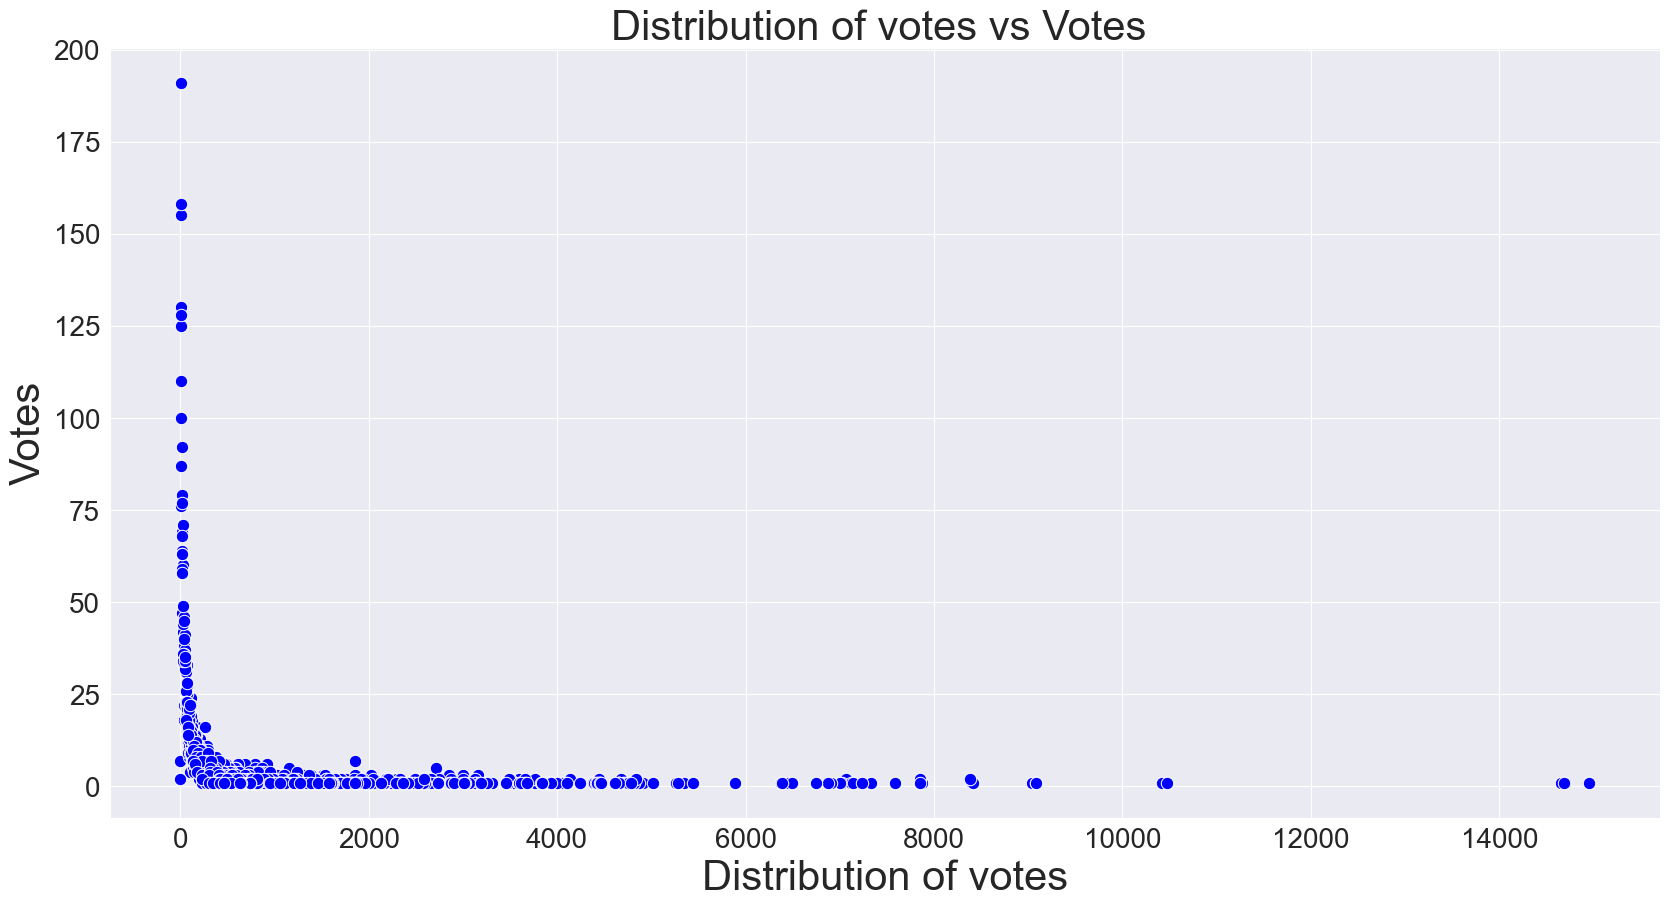

In [43]:
fig = plt.figure(figsize=(20,10))

sns.scatterplot(list(votes.keys()),list(votes.values()),s=80, color='blue')

plt.xlabel('Distribution of votes',size=30)
plt.ylabel('Votes',size=30)
plt.title('Distribution of votes vs Votes ',size=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=0)
plt.show()


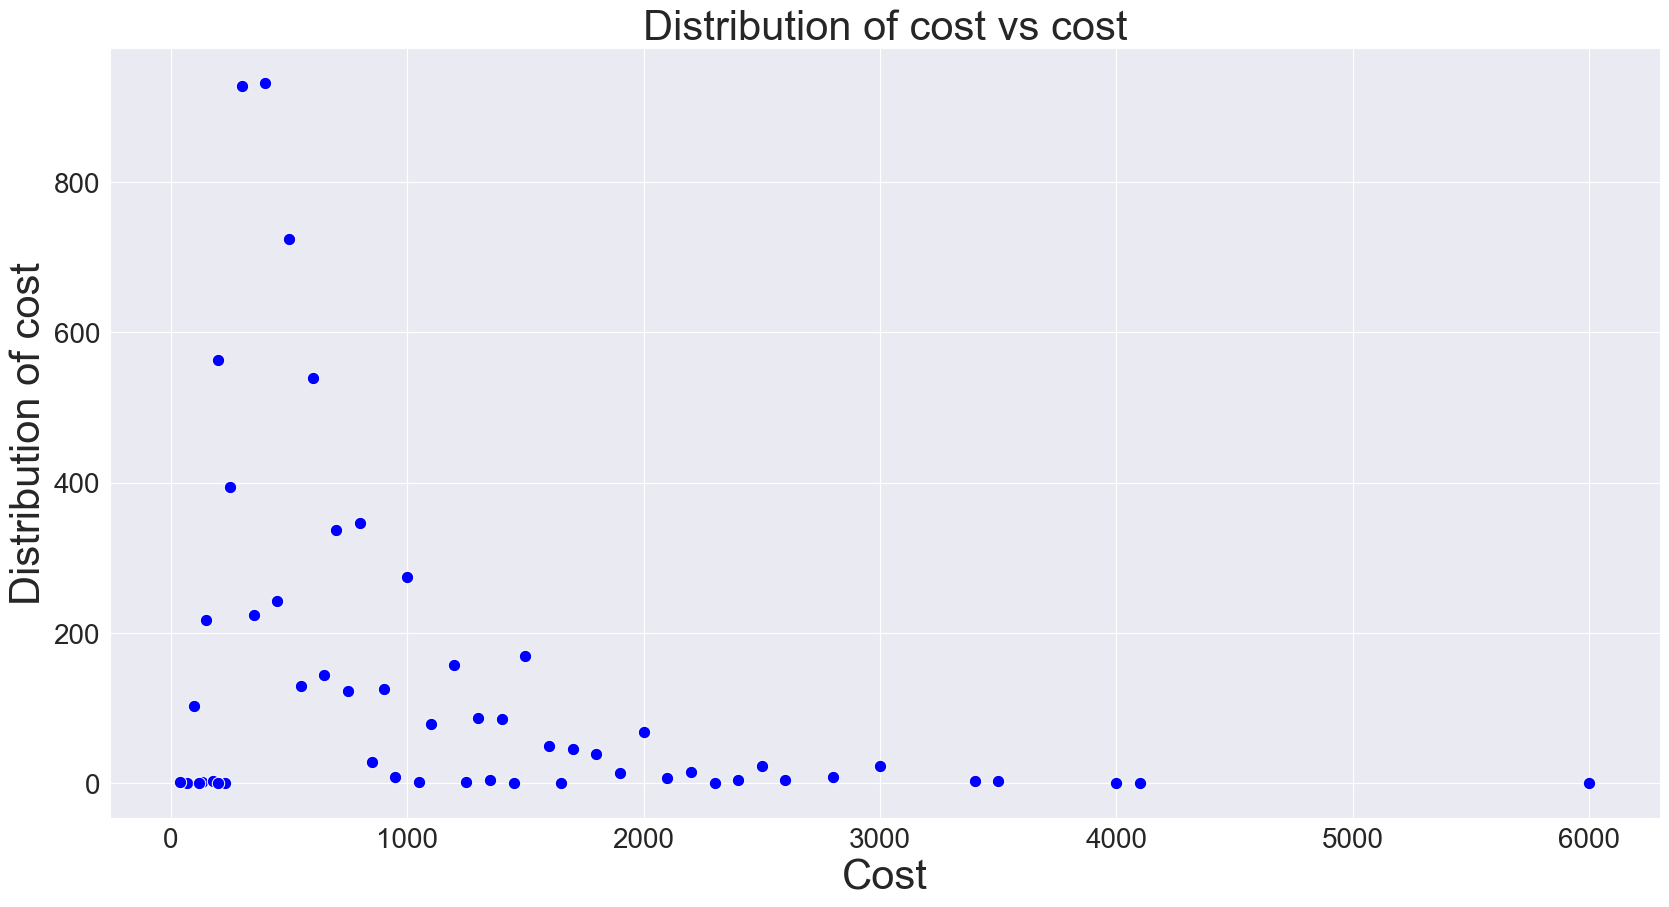

In [44]:
fig = plt.figure(figsize=(20,10))

sns.scatterplot(list(costs.keys()),list(costs.values()),s=80, color='blue')

plt.xlabel('Cost',size=30)
plt.ylabel('Distribution of cost',size=30)
plt.title('Distribution of cost vs cost',size=30)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=0)
plt.show()


**8. The most common restaurant type in Banglore are:**

In [45]:
d=zomato_dataset.groupby('Rest_type').size().sort_values(ascending=False)#.reset_index()
d
df=pd.DataFrame(d, columns=["No_of_each_type_restaurant"]).reset_index()[0:10] #size_name is a Series. 
#Converting it into a DataFrame 
df.head()

,Rest_type,No_of_each_type_restaurant
0,Quick Bites,2431
1,Casual Dining,1700
2,Cafe,580
3,Dessert Parlor,340
4,Delivery,298


**9. Difference between the votes of restaurants accepting and not accepting online orders**

In [46]:
zomato_dataset.head()
df=zomato_dataset.groupby('online_order')['No_of_votes'].sum().reset_index()
df
l=list(df.No_of_votes)

if(l[0]>l[1]):
    d = l[0]-l[1]
else:
    d = l[1]-l[0]
print("The difference between the votes of restaurants accepting and not accepting online orders is:", d)

The difference between the votes of restaurants accepting and not accepting online orders is: 615679


**10. The list of best budget restaurants in any location are:**

In [47]:
#Assuming that the best budget lies from 40 to 200 rupees:

budget_df=zomato_dataset.groupby(['Name','City'])['Cost','Ratings'].min().sort_values(by=['Cost','Ratings'], 
                                                                             ascending = [True,False]).reset_index()[:150]
budget_df.head()


,Name,City,Cost,Ratings
0,Srinidhi Sagar Food Line,Church Street,40.0,3.7
1,Srinidhi Sagar Deluxe,Koramangala 4th Block,40.0,3.6
2,Nellore Dosa Camp,BTM,70.0,3.3
3,Taaza Thindi,Banashankari,100.0,4.7
4,South Kitchen,Banashankari,100.0,4.3


**11. The list of top quick bites restaurant chains in Banglore are:**

In [48]:
#Method 1
mask =(zomato_dataset.Rest_type == "Quick Bites") | (zomato_dataset.Rest_type == "Sweet Shop") | (zomato_dataset.Rest_type == "Sweet Shop, Quick Bites")
top_qb =zomato_dataset[mask]
df=top_qb.groupby('Name')['Ratings'].max().sort_values(ascending=False).reset_index()[0:50]
df.head()

#list(df.Name)

,Name,Ratings
0,Taaza Thindi,4.7
1,CTR,4.7
2,Chikkanna Tiffin Room,4.5
3,Veena Stores,4.5
4,Siddiqu Kabab Center,4.4


In [49]:
#Better method

def func(text):
        if(text.lower().__contains__('quick bites')):
            return True
        else:
            return False
mask = zomato_dataset['Rest_type'].apply(func)

top_qb =zomato_dataset[mask]
df=top_qb.groupby('Name')['Ratings'].max().sort_values(ascending=False).reset_index()[0:50]
df.head()

#list(df.Name)

,Name,Ratings
0,CTR,4.7
1,Taaza Thindi,4.7
2,Veena Stores,4.5
3,Chikkanna Tiffin Room,4.5
4,Gods Own Cafe,4.4



**12. With the help of a related plot the most popular casual dining restaurant chains:**


In [50]:
def func(text):
        if(text.lower().__contains__('casual dining')):
            return True
        else:
            return False
mask = zomato_dataset['Rest_type'].apply(func)

top_qb =zomato_dataset[mask]
df=top_qb.groupby('Name')['Ratings'].max().sort_values(ascending=False).reset_index()[0:5]
list(df.Name)

df.head()

,Name,Ratings
0,Asia Kitchen By Mainland China,4.9
1,Flechazo,4.9
2,Punjab Grill,4.9
3,ABs Absolute Barbecues,4.9
4,The Black Pearl,4.8


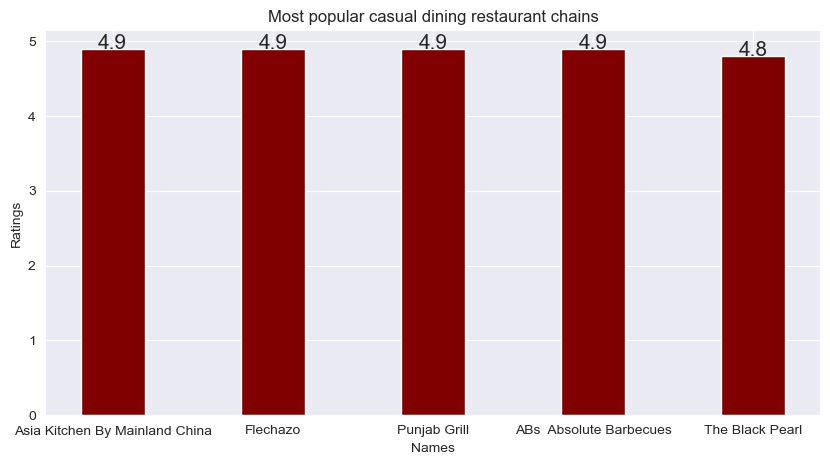

In [51]:
fig = plt.figure(figsize = (10,5))
 
#creating the bar plot
plt.bar(df.Name, df.Ratings, color ='maroon', width = 0.4)

for i,e in enumerate(df.Ratings):
    plt.text(i,e, round(e,2),fontsize=15,horizontalalignment='center')

plt.xlabel("Names")
plt.ylabel("Ratings")
plt.title("Most popular casual dining restaurant chains")
plt.show()

**13. The most popular cuisines of Bangalore are:**

In [52]:
d=zomato_dataset.groupby('Cusines').size().sort_values(ascending=False)#.reset_index()

df=pd.DataFrame(d, columns=["No_of_demand"]).reset_index()[0:10] #size_name is a Series.
#Converting it into a DataFrame 
df.head()


,Cusines,No_of_demand
0,"North Indian, Chinese",340
1,North Indian,338
2,South Indian,215
3,"Bakery, Desserts",126
4,"South Indian, North Indian, Chinese",110


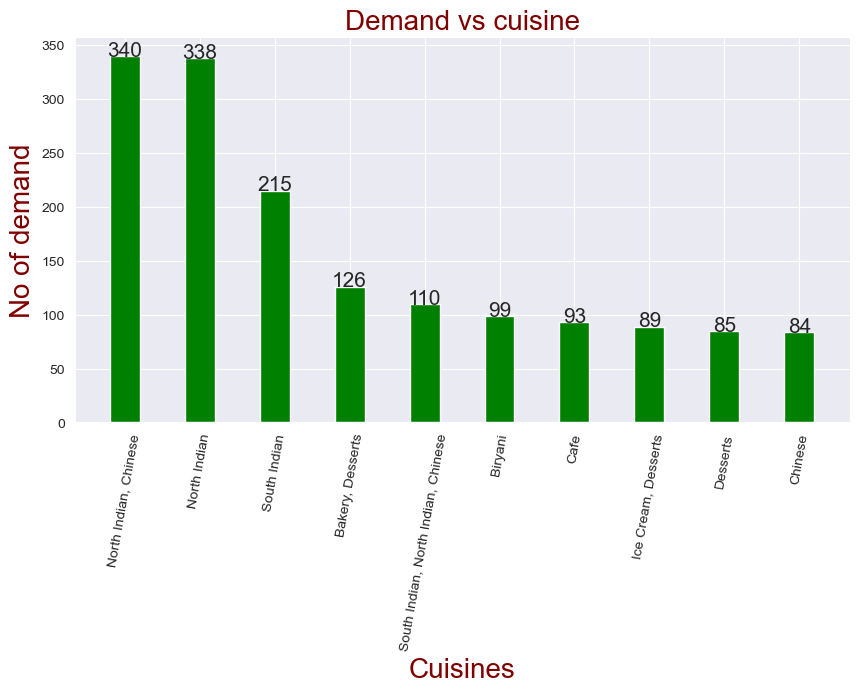

In [53]:
fig = plt.figure(figsize = (10,5))
 
#creating the bar plot
plt.bar(df.Cusines, df.No_of_demand, color='green', width = 0.4)

for i,e in enumerate(df.No_of_demand):
    plt.text(i,e, round(e,2),fontsize=15,horizontalalignment='center')

plt.xlabel('Cuisines',size=20,color='maroon')
plt.ylabel('No of demand',size=20,color='maroon')
plt.title('Demand vs cuisine',size=20, color='maroon')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=80)
plt.show()

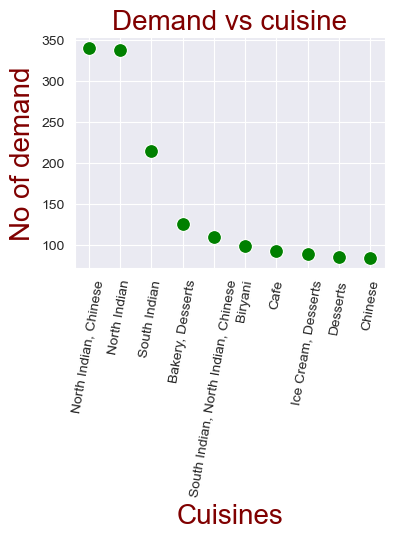

In [54]:
fig = plt.figure(figsize=(4,3))

sns.scatterplot(df.Cusines, df.No_of_demand,s=100, color='green')

#for i,e in enumerate(df.No_of_demand):
    #plt.text(i,e, round(e,2),fontsize=15,horizontalalignment='left')
    
plt.xlabel('Cuisines',size=20,color='maroon')
plt.ylabel('No of demand',size=20,color='maroon')
plt.title('Demand vs cuisine',size=20, color='maroon')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10,rotation=80)
plt.show()